In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [ ]:
df=pd.read_excel('/content/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.drop(columns=['Churn Label','Churn Score','CLTV','Churn Reason'],axis=1,inplace=True)


In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df.drop(['CustomerID','Country','State','Lat Long'],axis=1,inplace=True)
df.head()

,Count,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,1,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,1,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,1,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df["City"]=df['City'].replace(' ','_',regex=True)

In [ ]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [ ]:
df.columns=df.columns.str.replace(' ','_')

In [ ]:
df.columns

Index(['Count', 'City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender',
       'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

In [ ]:
df.dtypes

,0
Count,int64
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64


In [ ]:
df.isnull().sum()

,0
Count,0
City,0
Zip_Code,0
Latitude,0
Longitude,0
Gender,0
Senior_Citizen,0
Partner,0
Dependents,0
Tenure_Months,0


In [ ]:
len(df.loc[df['Total_Charges']==' '])

11

In [ ]:
df.loc[(df['Total_Charges']==' '),'Total_Charges']=0

In [ ]:
df.loc[df['Total_Charges']==0]

,Count,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,1,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,1,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,1,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,1,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,1,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,1,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,1,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,1,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,1,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,1,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [ ]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'])

In [ ]:
df.dtypes

,0
Count,int64
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64


In [ ]:
df=df.replace(' ','_',regex=True)

In [ ]:
df

,Count,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,1,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,1,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,1,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,1,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,Yes,Bank_transfer_(automatic),21.15,1419.40,0
7039,1,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,...,Yes,Yes,Yes,Yes,One_year,Yes,Mailed_check,84.80,1990.50,0
7040,1,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,...,Yes,No,Yes,Yes,One_year,Yes,Credit_card_(automatic),103.20,7362.90,0
7041,1,Angelus_Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.60,346.45,0


In [ ]:
x=df.drop('Churn_Value',axis=1)
x

,Count,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,1,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,1,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,1,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,1,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,Yes,Bank_transfer_(automatic),21.15,1419.40
7039,1,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,...,No,Yes,Yes,Yes,Yes,One_year,Yes,Mailed_check,84.80,1990.50
7040,1,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,...,Yes,Yes,No,Yes,Yes,One_year,Yes,Credit_card_(automatic),103.20,7362.90
7041,1,Angelus_Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,29.60,346.45


In [ ]:
y=df['Churn_Value'].copy()
y

,Churn_Value
0,1
1,1
2,1
3,1
4,1
...,...
7038,0
7039,0
7040,0
7041,0


In [ ]:
x.dtypes=='object'

,0
Count,False
City,True
Zip_Code,False
Latitude,False
Longitude,False
Gender,True
Senior_Citizen,True
Partner,True
Dependents,True
Tenure_Months,False


In [ ]:
x_encoded=pd.get_dummies(x,columns=['City','Gender','Senior_Citizen','Partner','Dependents','Phone_Service',
'Multiple_Lines',
'Internet_Service',
'Online_Security'	,
'Online_Backup',
'Device_Protection',
'Tech_Support',
'Streaming_TV',
'Streaming_Movies',
'Contract',
'Paperless_Billing',
'Payment_Method'
],dtype=int)
x_encoded.head()

,Count,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,1,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,1,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,1,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [ ]:
np.round((sum(y)/len(y))*100)

np.float64(27.0)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42,stratify=y)

In [ ]:
sum(y_train)/len(y_train)

0.2654297614539947

In [ ]:
sum(y_test)/len(y_test)

0.26519023282226006

In [ ]:

# Convert to DMatrix
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',
    'seed': 42
}

# Watchlist for evaluation
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Train with early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=watchlist,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Predictions
y_pred = bst.predict(dtest)
auc_score = roc_auc_score(y_test, y_pred)
print("AUC-PR:", auc_score)


[0]	train-aucpr:0.70363	eval-aucpr:0.64484
[1]	train-aucpr:0.73277	eval-aucpr:0.65281
[2]	train-aucpr:0.74454	eval-aucpr:0.66059
[3]	train-aucpr:0.76364	eval-aucpr:0.65424
[4]	train-aucpr:0.77275	eval-aucpr:0.66064
[5]	train-aucpr:0.78168	eval-aucpr:0.66153
[6]	train-aucpr:0.78938	eval-aucpr:0.66547
[7]	train-aucpr:0.79087	eval-aucpr:0.66499
[8]	train-aucpr:0.79806	eval-aucpr:0.66667
[9]	train-aucpr:0.80427	eval-aucpr:0.66309
[10]	train-aucpr:0.80858	eval-aucpr:0.66416
[11]	train-aucpr:0.81428	eval-aucpr:0.66180
[12]	train-aucpr:0.82173	eval-aucpr:0.66855
[13]	train-aucpr:0.82344	eval-aucpr:0.66674
[14]	train-aucpr:0.82609	eval-aucpr:0.66577
[15]	train-aucpr:0.82818	eval-aucpr:0.66509
[16]	train-aucpr:0.83727	eval-aucpr:0.66491
[17]	train-aucpr:0.84365	eval-aucpr:0.66553
[18]	train-aucpr:0.84497	eval-aucpr:0.66463
[19]	train-aucpr:0.84896	eval-aucpr:0.66598
[20]	train-aucpr:0.85017	eval-aucpr:0.66601
[21]	train-aucpr:0.85100	eval-aucpr:0.66762
[22]	train-aucpr:0.85360	eval-aucpr:0.6672

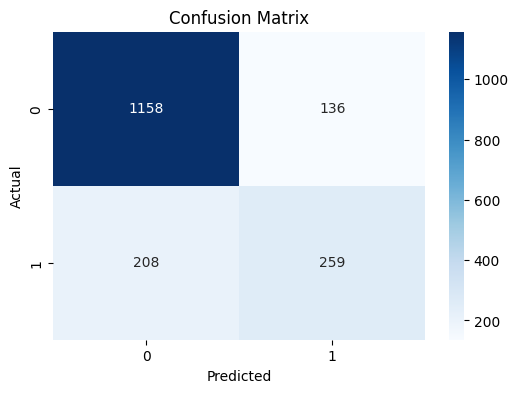

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Predict probabilities
y_pred_prob = bst.predict(dtest)

# Step 2: Convert probabilities to class labels (threshold = 0.5)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 4: Plot as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[0]	train-aucpr:0.59515	eval-aucpr:0.58057
[1]	train-aucpr:0.61437	eval-aucpr:0.59572
[2]	train-aucpr:0.62886	eval-aucpr:0.60359
[3]	train-aucpr:0.65808	eval-aucpr:0.61961
[4]	train-aucpr:0.66298	eval-aucpr:0.62322
[5]	train-aucpr:0.66587	eval-aucpr:0.62487
[6]	train-aucpr:0.66824	eval-aucpr:0.62865
[7]	train-aucpr:0.66868	eval-aucpr:0.63000
[8]	train-aucpr:0.67135	eval-aucpr:0.62993
[9]	train-aucpr:0.67243	eval-aucpr:0.63184
[10]	train-aucpr:0.67381	eval-aucpr:0.63028
[11]	train-aucpr:0.67957	eval-aucpr:0.63281
[12]	train-aucpr:0.69511	eval-aucpr:0.64325
[13]	train-aucpr:0.69681	eval-aucpr:0.64511
[14]	train-aucpr:0.69792	eval-aucpr:0.64433
[15]	train-aucpr:0.69871	eval-aucpr:0.64473
[16]	train-aucpr:0.70139	eval-aucpr:0.64124
[17]	train-aucpr:0.70301	eval-aucpr:0.64151
[18]	train-aucpr:0.70484	eval-aucpr:0.63854
[19]	train-aucpr:0.70517	eval-aucpr:0.63877
[20]	train-aucpr:0.70583	eval-aucpr:0.63890
[21]	train-aucpr:0.70797	eval-aucpr:0.64418
[22]	train-aucpr:0.70970	eval-aucpr:0.6438

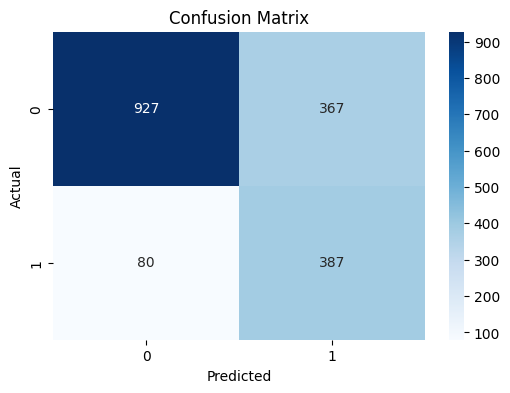

AUC-PR: 0.8590711867323737


In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Convert your train and test sets to DMatrix
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define parameters (translated from your XGBClassifier)
params = {
    'objective': 'binary:logistic',
    'gamma': 0.25,
    'eta': 0.1,               # learn_rate -> eta
    'max_depth': 4,
    'lambda': 10,             # reg_lambda -> lambda
    'scale_pos_weight': 3,
    'subsample': 0.9,
    'colsample_bytree': 0.5,
    'eval_metric': 'aucpr',
    'seed': 42
}

# Evaluation set
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train with early stopping
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,             # large number of rounds
    evals=evals,
    early_stopping_rounds=10,         # stops training if no improvement for 10 rounds
    verbose_eval=True
)

# Predict on test set
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-PR
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC-PR:", auc_score)


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


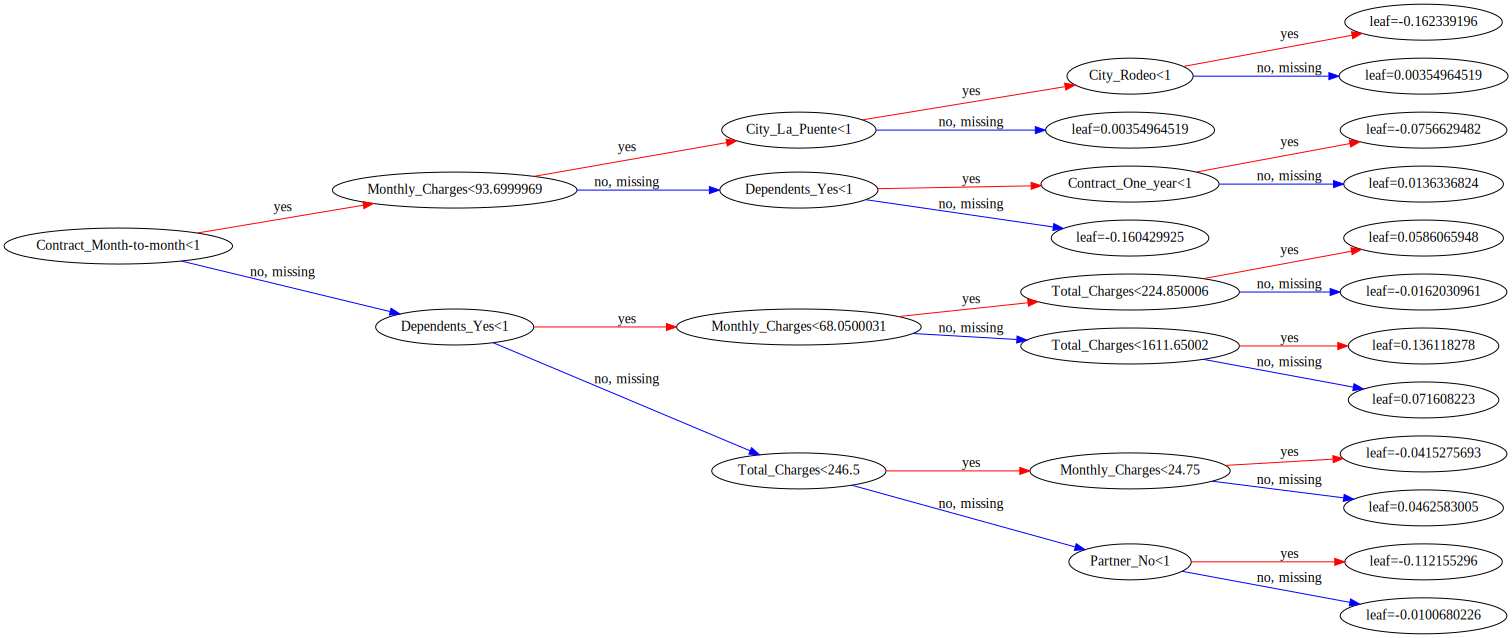

In [ ]:
import graphviz
from xgboost import to_graphviz

# Export the first tree
dot_data = to_graphviz(bst, num_trees=0, rankdir='LR')
dot_data.render("xgb_tree", format="png", cleanup=True)  # saves as xgb_tree.png
dot_data


<Figure size 1000x600 with 0 Axes>

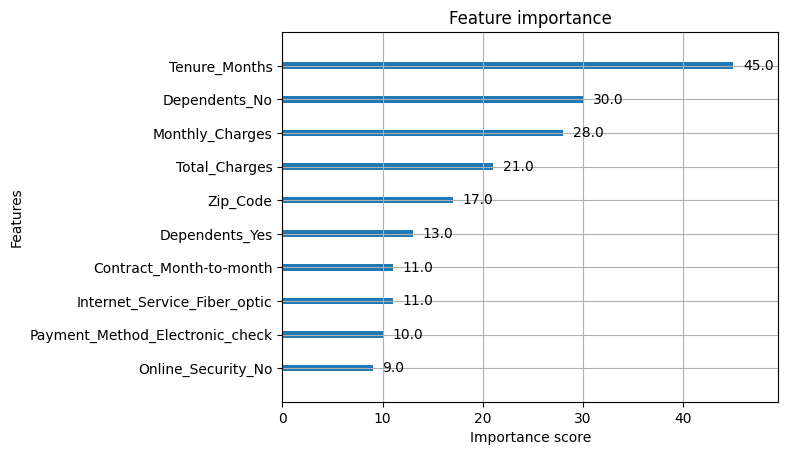

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(bst, importance_type='weight', max_num_features=10)
plt.show()


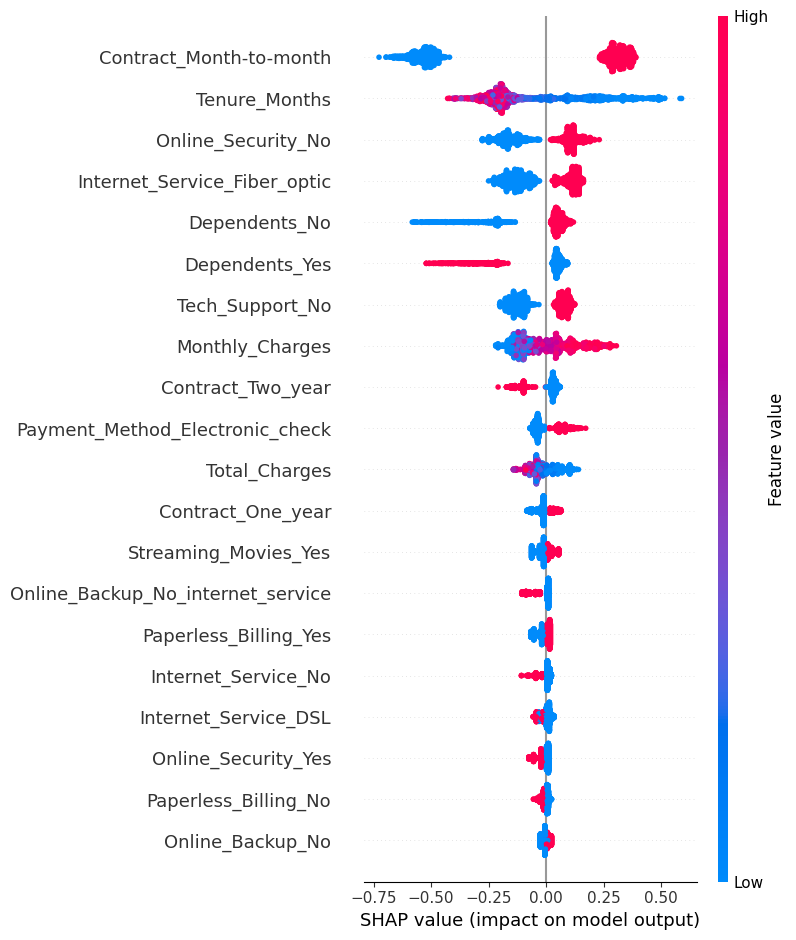

In [ ]:
import shap

# Create explainer
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(x_test)

# Summary plot (like a forest of feature effects)
shap.summary_plot(shap_values, x_test, plot_type="dot")  # or "bar"


In [ ]:
import pandas as pd

# Create a DataFrame with actual and predicted values
pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Prob': y_pred_prob,   # probability
    'Predicted_Class': y_pred        # 0/1 class
})

# Save to Excel (Colab-friendly)
file_path = '/content/xgb_predictions.xlsx'
pred_df.to_excel(file_path, index=False)

print(f"Predictions saved to: {file_path}")

from google.colab import files
files.download(file_path)



Predictions saved to: /content/xgb_predictions.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>